In [1]:
import pandas as pd
import seaborn as sns
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('Data/rejected.csv')

In [4]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

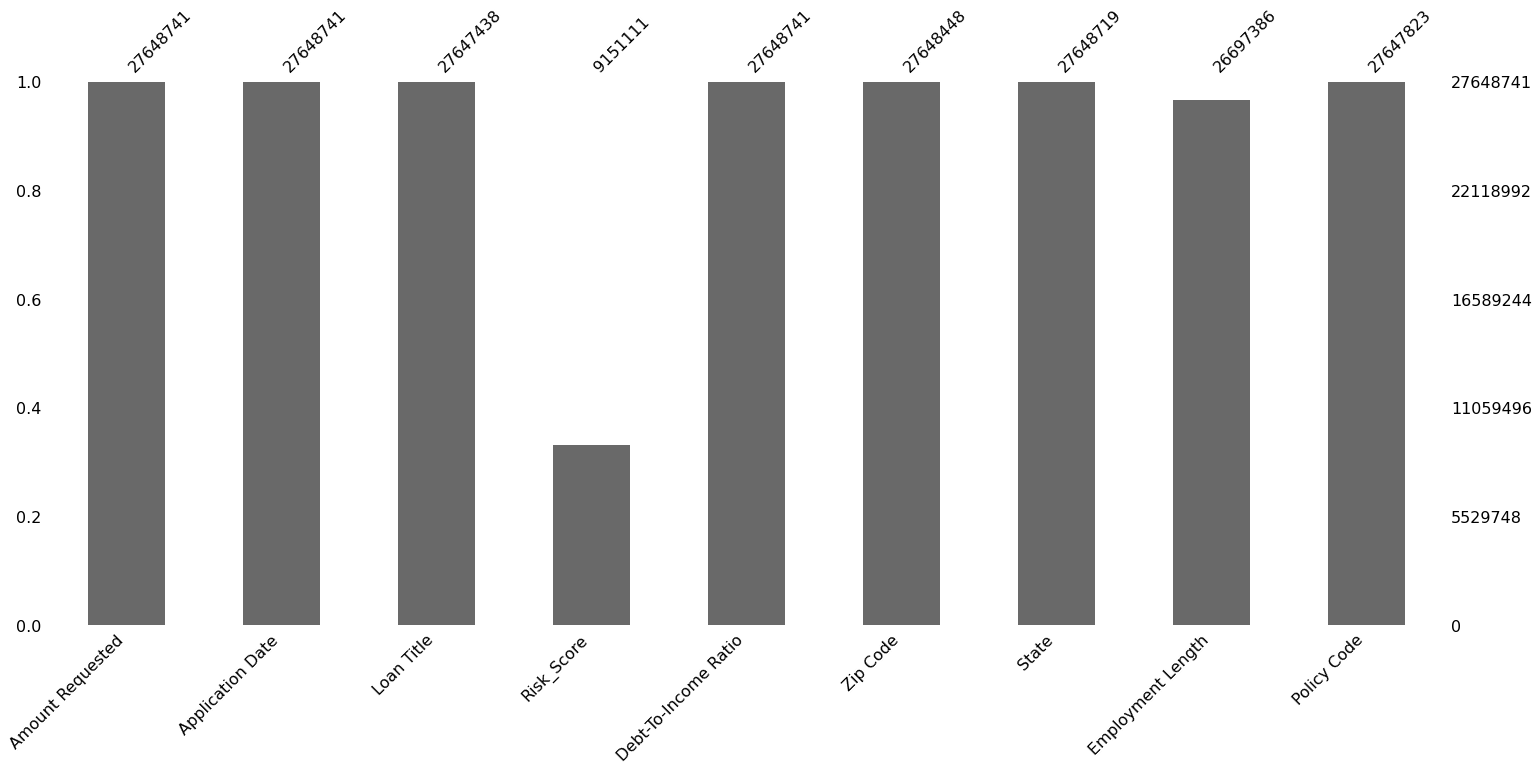

In [6]:
msnum.bar(rejected);

In [21]:
r = rejected[['Debt-To-Income Ratio']]
r = r.assign(Accepted = 0)
r

,Debt-To-Income Ratio,Accepted
0,10%,0
1,10%,0
2,10%,0
3,38.64%,0
4,9.43%,0
...,...,...
27648736,41.26%,0
27648737,1.48%,0
27648738,10.26%,0
27648739,17.71%,0


In [23]:
r.dtypes

Debt-To-Income Ratio    object
Accepted                 int64
dtype: object

In [24]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [25]:
r.dtypes

DI          object
Accepted     int64
dtype: object

In [30]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [31]:
r

,DI,Accepted
0,0.1000,0
1,0.1000,0
2,0.1000,0
3,0.3864,0
4,0.0943,0
...,...,...
27648736,0.4126,0
27648737,0.0148,0
27648738,0.1026,0
27648739,0.1771,0


In [87]:
r.describe()

,DI,Accepted
count,2.764874e+07,27648741.0
mean,1.433401e+00,0.0
std,1.053916e+02,0.0
min,-1.000000e-02,0.0
25%,8.060000e-02,0.0
50%,1.998000e-01,0.0
75%,3.661000e-01,0.0
max,5.000003e+05,0.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DI', ylabel='Density'>

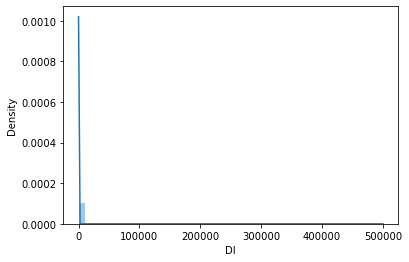

In [88]:
sns.distplot(r.DI)

In [32]:
r.dtypes

DI          float64
Accepted      int64
dtype: object

In [92]:
r.dropna(inplace=True)
r

,DI,Accepted
0,0.1000,0
1,0.1000,0
2,0.1000,0
3,0.3864,0
4,0.0943,0
...,...,...
27648736,0.4126,0
27648737,0.0148,0
27648738,0.1026,0
27648739,0.1771,0


In [7]:
accepted = pd.read_csv('Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
a = accepted[['loan_amnt', 'annual_inc']]

In [14]:
a = a.assign(DI = (a['loan_amnt'] / a['annual_inc']))

In [15]:
a

,loan_amnt,annual_inc,DI
0,3600.0,55000.0,0.065455
1,24700.0,65000.0,0.380000
2,20000.0,63000.0,0.317460
3,35000.0,110000.0,0.318182
4,10400.0,104433.0,0.099585
...,...,...,...
2260696,40000.0,227000.0,0.176211
2260697,24000.0,110000.0,0.218182
2260698,14000.0,95000.0,0.147368
2260699,NaN,NaN,NaN


In [16]:
a.isnull().sum()

loan_amnt     33
annual_inc    37
DI            37
dtype: int64

In [19]:
a = a.assign(Accepted = 1)

In [20]:
a

,loan_amnt,annual_inc,DI,Accepted
0,3600.0,55000.0,0.065455,1
1,24700.0,65000.0,0.380000,1
2,20000.0,63000.0,0.317460,1
3,35000.0,110000.0,0.318182,1
4,10400.0,104433.0,0.099585,1
...,...,...,...,...
2260696,40000.0,227000.0,0.176211,1
2260697,24000.0,110000.0,0.218182,1
2260698,14000.0,95000.0,0.147368,1
2260699,NaN,NaN,NaN,1


In [33]:
a.dtypes

loan_amnt     float64
annual_inc    float64
DI            float64
Accepted        int64
dtype: object

In [89]:
a.describe()

,DI,Accepted
count,2.260664e+06,2260701.0
mean,inf,1.0
std,NaN,0.0
min,1.612903e-04,1.0
25%,1.250000e-01,1.0
50%,2.000000e-01,1.0
75%,2.990593e-01,1.0
max,inf,1.0


In [35]:
a = a[['DI', 'Accepted']]

In [36]:
a

,DI,Accepted
0,0.065455,1
1,0.380000,1
2,0.317460,1
3,0.318182,1
4,0.099585,1
...,...,...
2260696,0.176211,1
2260697,0.218182,1
2260698,0.147368,1
2260699,NaN,1


In [37]:
combo = pd.concat([a,r])
combo

,DI,Accepted
0,0.065455,1
1,0.380000,1
2,0.317460,1
3,0.318182,1
4,0.099585,1
...,...,...
27648736,0.412600,0
27648737,0.014800,0
27648738,0.102600,0
27648739,0.177100,0


In [38]:
combo.isna().sum()

DI          37
Accepted     0
dtype: int64

In [71]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [72]:
few

,DI,Accepted
13297823,1.000000,0
17115647,1.000000,0
9207377,0.155100,0
16959527,0.375600,0
26039207,0.168400,0
...,...,...
1998830,0.312500,1
1811612,0.329304,1
680904,0.245500,1
366057,0.357143,1


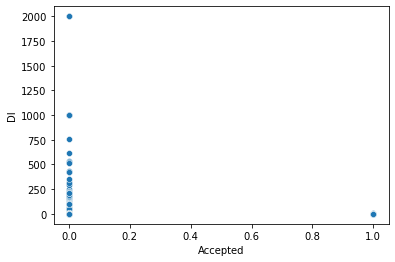

In [73]:
sns.scatterplot(data=few, y='DI', x='Accepted');

<AxesSubplot:xlabel='DI', ylabel='Count'>

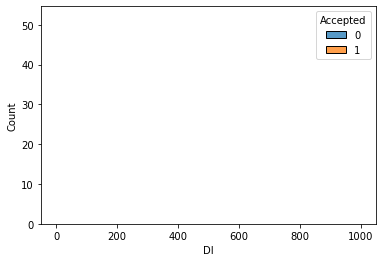

In [61]:
sns.histplot(data=few, x='DI', hue='Accepted', multiple='stack');

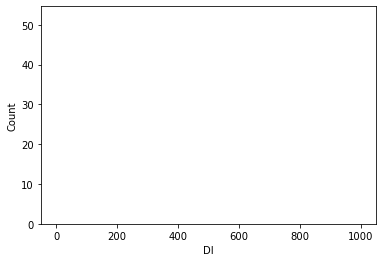

In [62]:
sns.histplot(data=few, x='DI');

In [74]:
few.describe()

,DI,Accepted
count,2.991000e+04,29910.000000
mean,inf,0.075593
std,NaN,0.264351
min,-1.000000e-02,0.000000
25%,8.531646e-02,0.000000
50%,1.993500e-01,0.000000
75%,3.607750e-01,0.000000
max,inf,1.000000


In [75]:
selected = few[few.DI<1]

In [84]:
selected = selected.reset_index(drop=True)

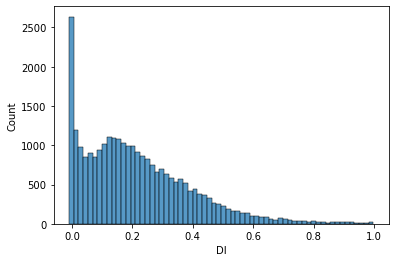

In [85]:
sns.histplot(data=selected, x='DI');

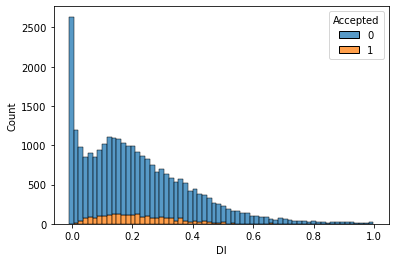

In [86]:
sns.histplot(data=selected, x='DI', hue='Accepted', multiple='stack');

In [ ]:
msnum.bar(rejected);

In [3]:
pd.read_excel('Data/LCDataDictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
accepted.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [6]:
accepted.shape

(2260701, 151)

In [7]:
#accepted.isna().mean().sort_values()

In [8]:
#accepted['loan_status'].value_counts()

In [14]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'policy_code']]

In [17]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [20]:
a = a.assign(Accepted = 1)

In [38]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [42]:
a = a[['Risk_Score', 'Accepted']]

In [22]:
rejected = pd.read_csv('Data/rejected.csv')

In [23]:
rejected.head(3)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0


In [24]:
rejected.shape

(27648741, 9)

In [25]:
#rejected['Policy Code'].value_counts()

In [26]:
#rejected.describe()

In [30]:
r = rejected[['Risk_Score']]
r = r.assign(Accepted = 0)
r

,Risk_Score,Accepted
0,693.0,0
1,703.0,0
2,715.0,0
3,698.0,0
4,509.0,0
...,...,...
27648736,590.0,0
27648737,NaN,0
27648738,686.0,0
27648739,NaN,0


In [45]:
combo = pd.concat([a,r])
combo

,Risk_Score,Accepted
0,677.0,1
1,717.0,1
2,697.0,1
3,787.0,1
4,697.0,1
...,...,...
27648736,590.0,0
27648737,NaN,0
27648738,686.0,0
27648739,NaN,0


In [48]:
combo.sample(10)

,Risk_Score,Accepted
12490092,NaN,0
18182130,NaN,0
24943330,501.0,0
5284407,NaN,0
27248524,607.0,0
14324971,NaN,0
25285441,NaN,0
5623852,NaN,0
24717261,NaN,0
18759002,NaN,0


In [49]:
combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,Risk_Score,Accepted
19573367,NaN,0
12003266,NaN,0
1512352,707.0,1
200693,667.0,1


In [52]:
combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.000001))

,Risk_Score,Accepted
25697143,NaN,0
4276170,NaN,0
5081943,NaN,0
27501010,682.0,0
66938,657.0,0
16221129,NaN,0
16583495,NaN,0
6183289,NaN,0
21016517,512.0,0
536318,460.0,0
